



# 1.Choose a classification dataset and normalize features.




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Dataset loaded successfully.")
print("Original feature sample:\n", X[:3])
print("Normalized feature sample:\n", X_scaled[:3])
print("Target sample:\n", y[:3])


Dataset loaded successfully.
Original feature sample:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Normalized feature sample:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]
Target sample:
 [0 0 0]





# 2.Use KNeighborsClassifier from sklearn.



In [5]:
# Create a KNN classifier with default K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45






# 3.Experiment with different values of K.




Evaluation for different K values:

K = 1 → Accuracy: 0.9778
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

----------------------------------------
K = 3 → Accuracy: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted a

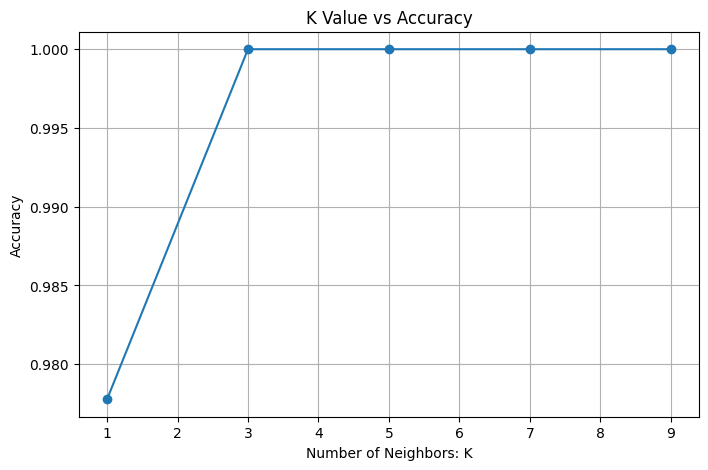

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracies = []  # Initialize accuracies list

print("Evaluation for different K values:\n")
for k in [1, 3, 5, 7, 9]:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_k_pred = knn_k.predict(X_test)
    acc = accuracy_score(y_test, y_k_pred)
    accuracies.append(acc)

    print(f"K = {k} → Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_k_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_k_pred))
    print("-" * 40)

# Plot K vs Accuracy
plt.figure(figsize=(8,5))
plt.plot([1, 3, 5, 7, 9], accuracies, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()





# 4.Evaluate model using accuracy, confusion matrix.





Final Evaluation with K = 5:
Number of training samples: 105
Number of test samples: 45
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Sample Predictions vs Actual:
Sample 1: Predicted = 1, Actual = 1
Sample 2: Predicted = 0, Actual = 0
Sample 3: Predicted = 2, Actual = 2
Sample 4: Predicted = 1, Actual = 1
Sample 5: Predicted = 1, Actual = 1
Sample 6: Predicted = 0, Actual = 0
Sample 7: Predicted = 1, Actual = 1
Sample 8: Predicted = 2, Actual = 2
Sample 9: Predicted = 1, Actual = 1
Sample 10: Predicted = 1, Actual = 1


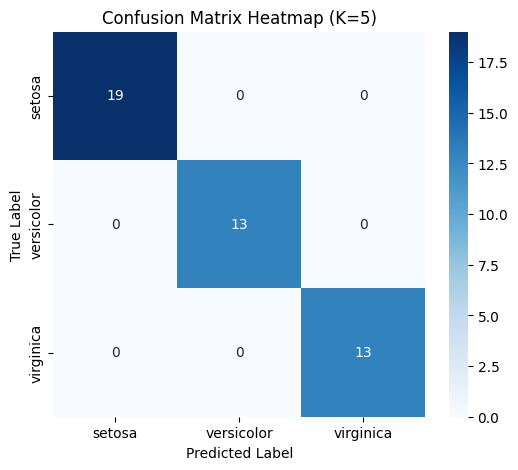

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("\nFinal Evaluation with K = 5:")

# Number of samples info
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")

# Accuracy and metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Show a few test samples with their predicted and actual labels
print("\nSample Predictions vs Actual:")
for i in range(10):
    print(f"Sample {i+1}: Predicted = {y_pred[i]}, Actual = {y_test[i]}")

# Plot confusion matrix heatmap for better visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (K=5)')
plt.show()





# 5.Visualize decision boundaries.




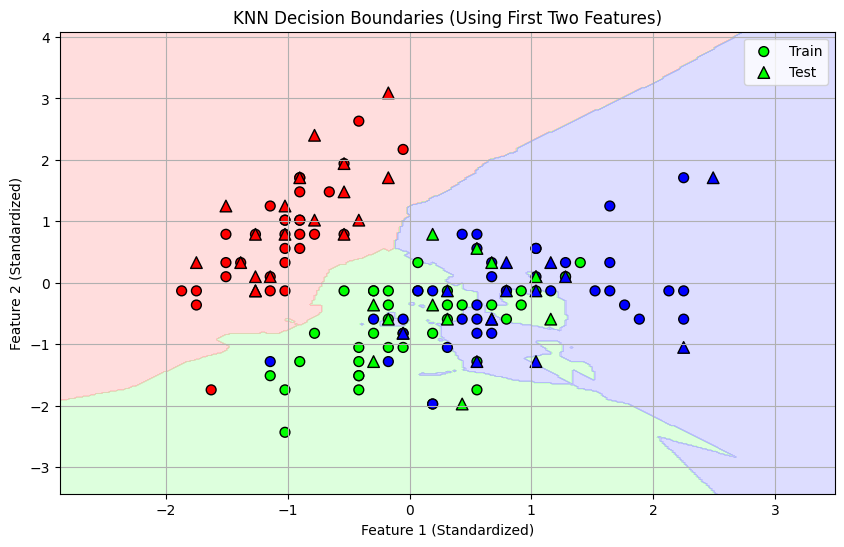

Accuracy on 2D test data (first two features): 0.7778


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Use first two features for visualization
X_vis = X_scaled[:, :2]
y_vis = y  # target labels

# Split into train and test sets (2D data)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Train KNN classifier on 2D data
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid for plotting decision boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundaries and data points
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=cmap_bold, edgecolor='k', s=50, marker='o', label='Train')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=cmap_bold, edgecolor='k', s=70, marker='^', label='Test')

plt.title("KNN Decision Boundaries (Using First Two Features)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.grid(True)
plt.show()

# Optional: print accuracy on the 2D test set
y_test_pred_vis = knn_vis.predict(X_test_vis)
from sklearn.metrics import accuracy_score
print(f"Accuracy on 2D test data (first two features): {accuracy_score(y_test_vis, y_test_pred_vis):.4f}")
